<a href="https://colab.research.google.com/github/Bhagyasri07/customer_purchase_behaviour_Data-Analysis-project/blob/main/customer_purchase_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/customer_purchase_data.csv')

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
print(df.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
scaler = StandardScaler()
df[['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite']] = scaler.fit_transform(df[['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite']])

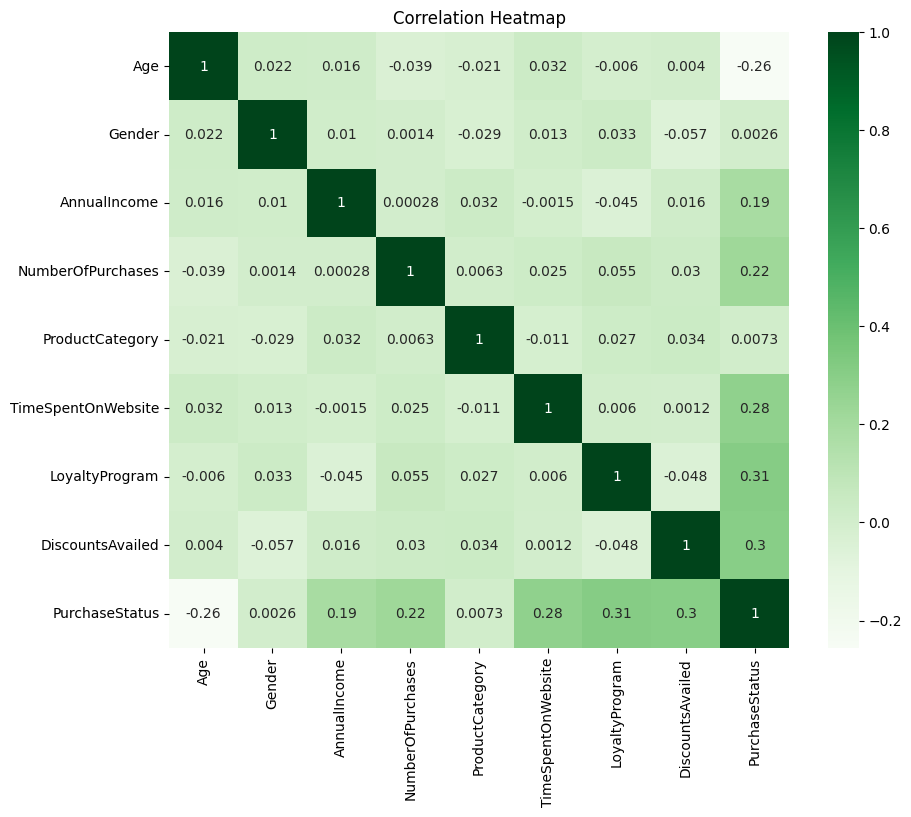

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

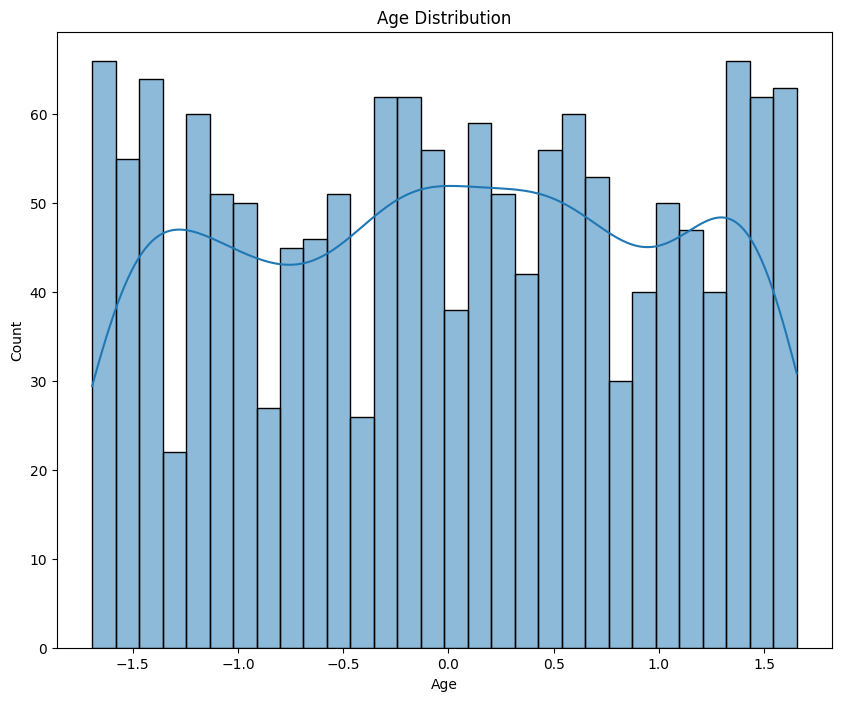

In [17]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

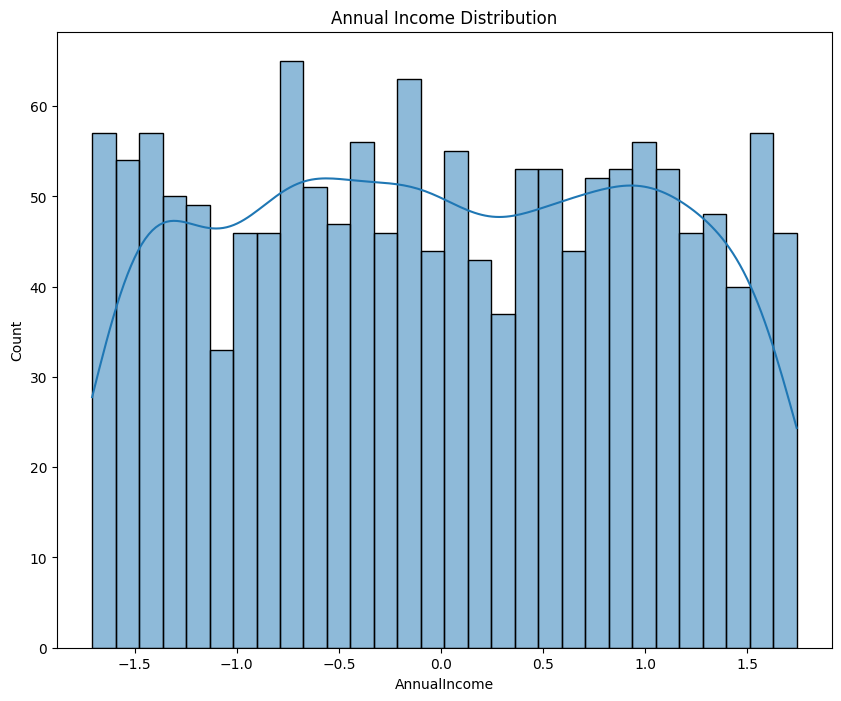

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(df['AnnualIncome'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

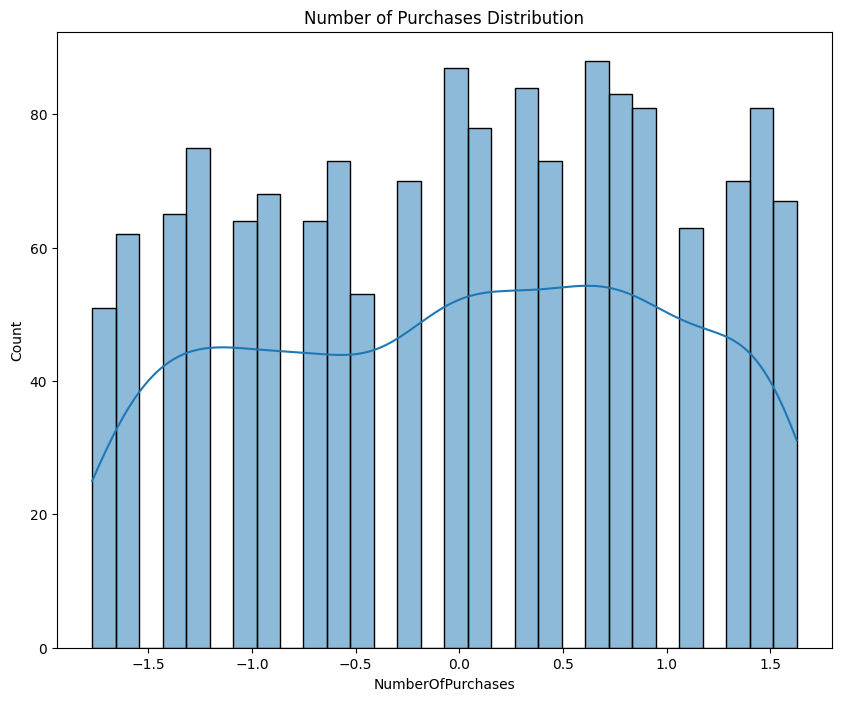

In [20]:
plt.figure(figsize=(10, 8))
sns.histplot(df['NumberOfPurchases'], kde=True, bins=30)
plt.title('Number of Purchases Distribution')
plt.show()

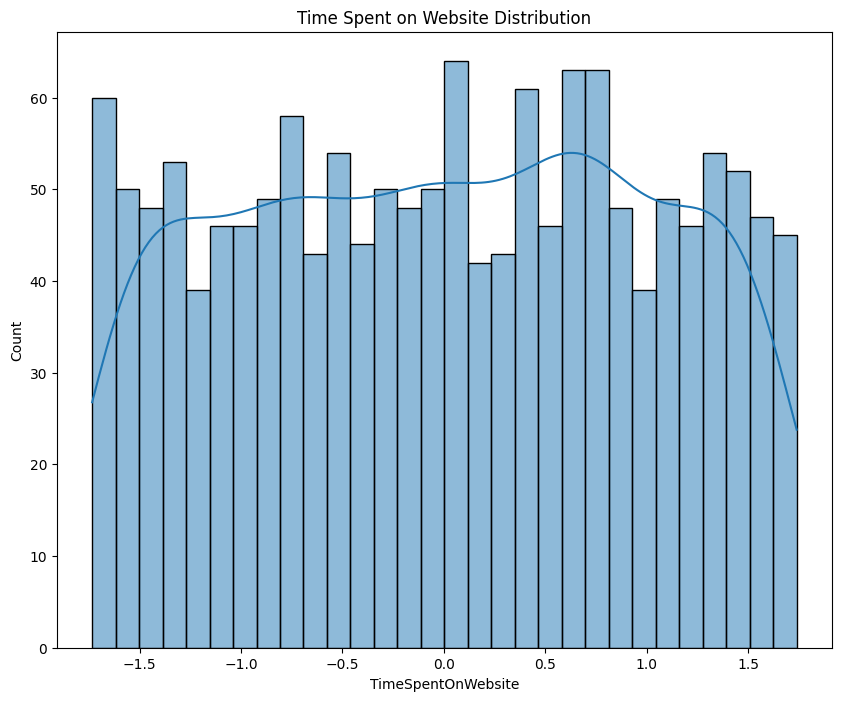

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(df['TimeSpentOnWebsite'], kde=True, bins=30)
plt.title('Time Spent on Website Distribution')
plt.show()

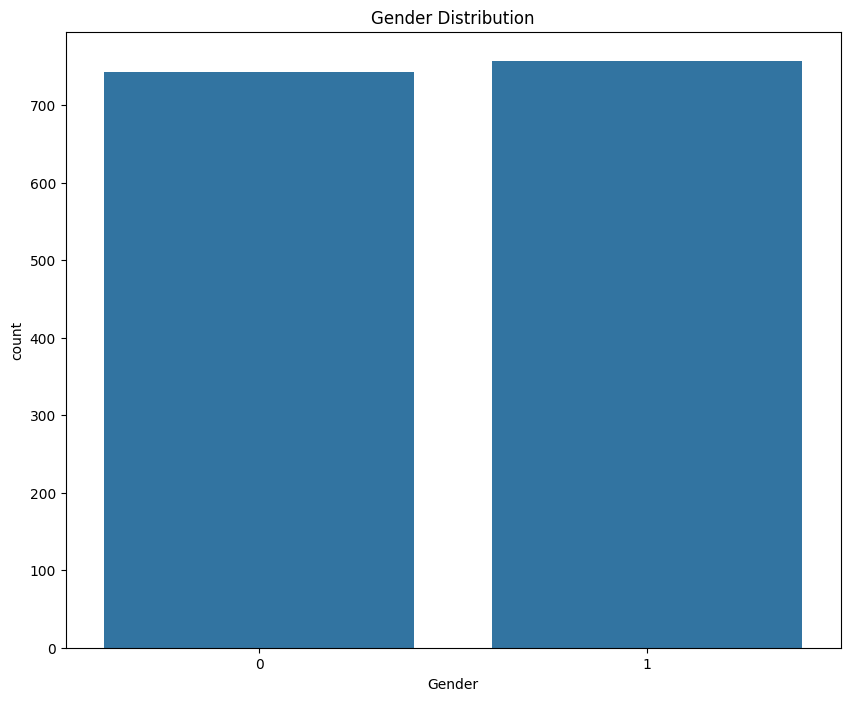

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

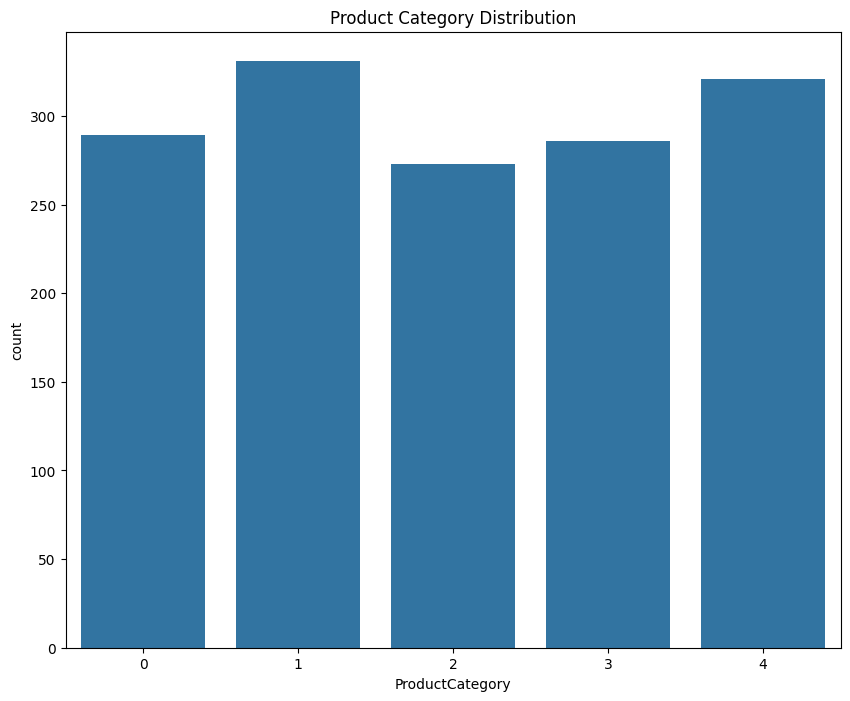

In [24]:
plt.figure(figsize=(10, 8))
sns.countplot(x='ProductCategory', data=df)
plt.title('Product Category Distribution')
plt.show()

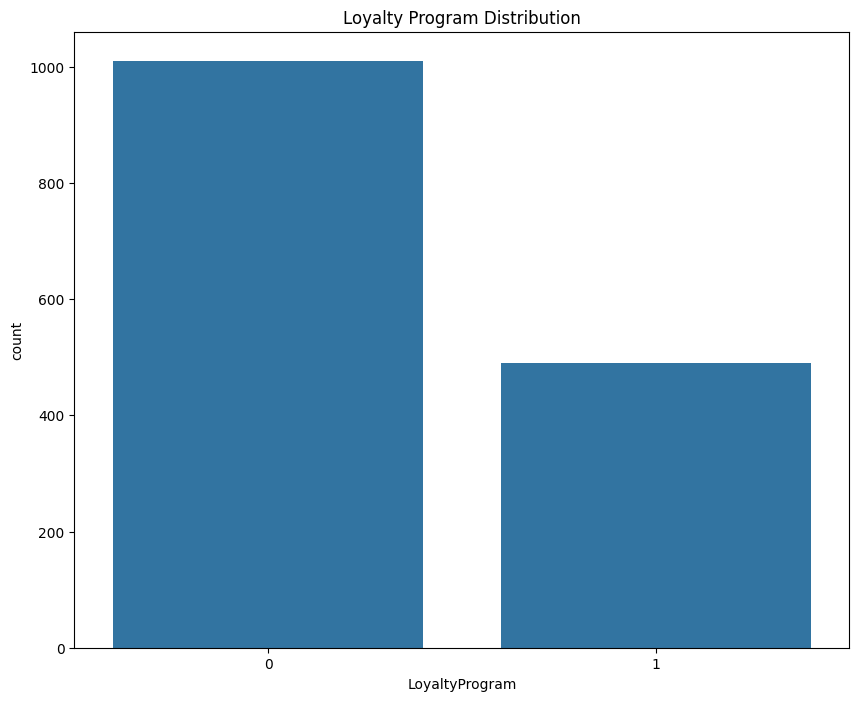

In [26]:
plt.figure(figsize=(10, 8))
sns.countplot(x='LoyaltyProgram', data=df)
plt.title('Loyalty Program Distribution')
plt.show()

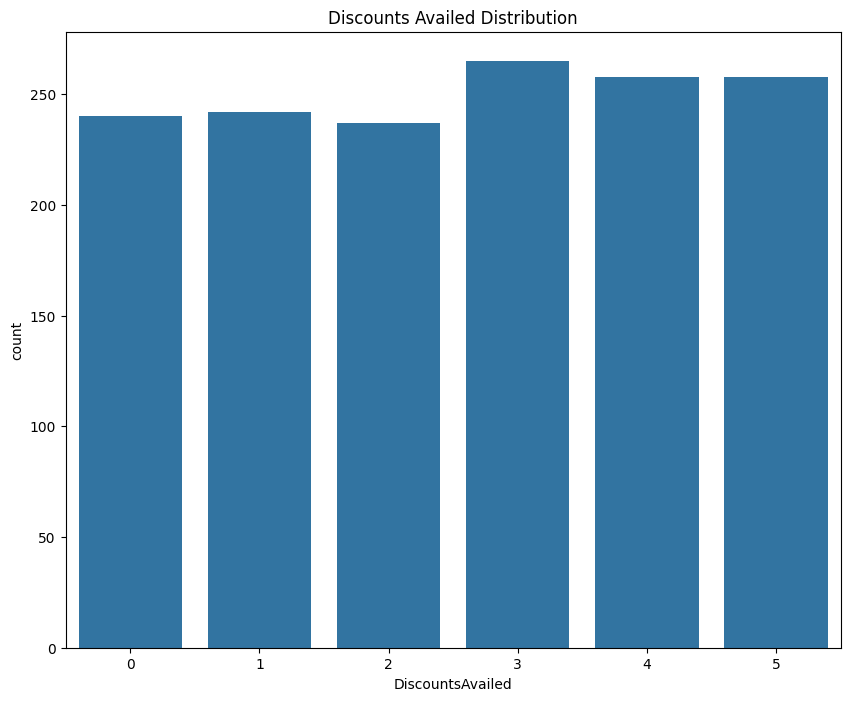

In [27]:
plt.figure(figsize=(10, 8))
sns.countplot(x='DiscountsAvailed', data=df)
plt.title('Discounts Availed Distribution')
plt.show()

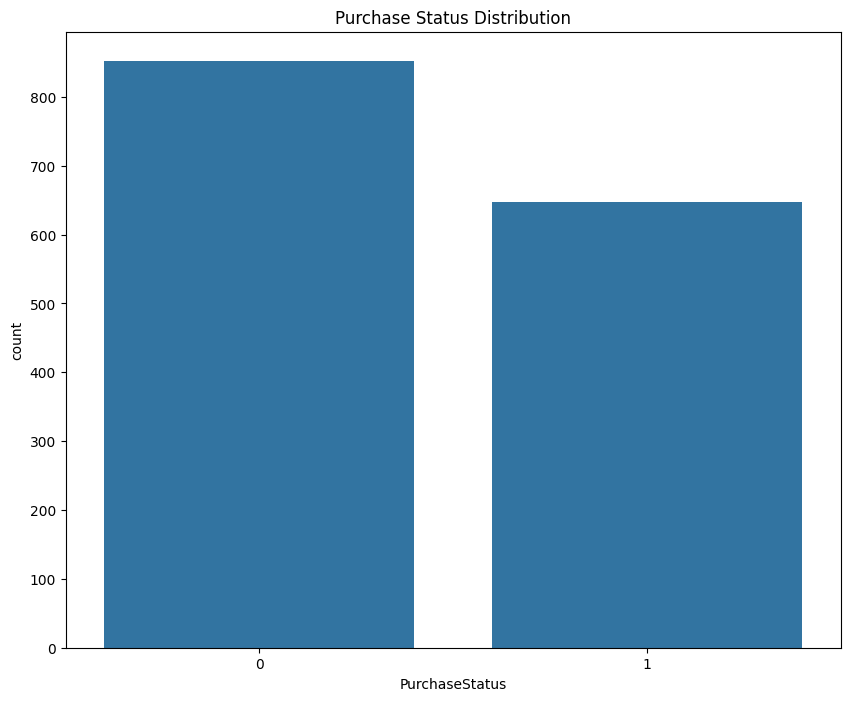

In [28]:
plt.figure(figsize=(10, 8))
sns.countplot(x='PurchaseStatus', data=df)
plt.title('Purchase Status Distribution')
plt.show()

In [30]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[171   1]
 [ 13 115]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.90      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



In [37]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy:.2f}%")

Confusion Matrix:
[[171   1]
 [ 13 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.90      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300


Accuracy: 95.33%


->True Negatives (TN): 171 (customers who did not make a purchase and were correctly predicted as not making a purchase).
->False Positives (FP): 1 (customers who did not make a purchase but were incorrectly predicted as making a purchase).
->False Negatives (FN): 13 (customers who made a purchase but were incorrectly predicted as not making a purchase).
->True Positives (TP): 115 (customers who made a purchase and were correctly predicted as making a purchase).

->Class 0 (No Purchase):

Precision: 0.93 (of all customers predicted not to make a purchase, 93% actually did not make a purchase).
Recall: 0.99 (of all customers who actually did not make a purchase, 99% were correctly predicted).
F1-Score: 0.96 (harmonic mean of precision and recall).
Support: 172 (total number of customers who did not make a purchase).

->Class 1 (Purchase):

Precision: 0.99 (of all customers predicted to make a purchase, 99% actually made a purchase).
Recall: 0.90 (of all customers who actually made a purchase, 90% were correctly predicted).
F1-Score: 0.94 (harmonic mean of precision and recall).
Support: 128 (total number of customers who made a purchase).

-> Overall Accuracy: 95.33% (the proportion of the total number of correct predictions).

->High Overall Accuracy:

The model has a high accuracy of 95.33%, indicating that it correctly predicts whether a customer will make a purchase or not in 95.33% of the cases.

->The model demonstrates a balanced performance with high precision, recall, and F1-scores for both classes.
The macro and weighted averages for precision, recall, and F1-score are all around 0.95, indicating consistent performance across classes.

Conclusion:

The model performs very well in predicting customer purchase behavior with high accuracy, precision, recall, and F1-scores. It effectively identifies customers who are likely to make purchases, with minimal false positives and a reasonable number of false negatives. Further refinements can focus on reducing false negatives to improve recall for the purchase class.





